# Завдання 1
Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

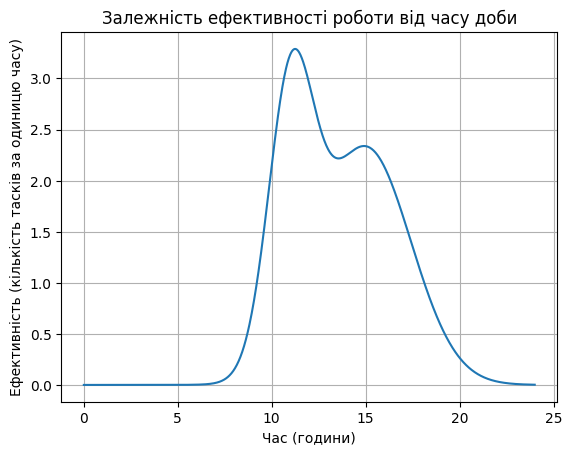

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Означимо функцію ефективності роботи
def efficiency_function(x):
    term1 = 2 * (4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2)**2)
    term2 = 2 * (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4)**2)
    return term1 + term2

# Відрізок часу від 0 до 24
x_vals = np.linspace(0, 24, 1000)
y_vals = efficiency_function(x_vals)

# Побудуємо графік
plt.plot(x_vals, y_vals)
plt.xlabel('Час (години)')
plt.ylabel('Ефективність (кількість тасків за одиницю часу)')
plt.title('Залежність ефективності роботи від часу доби')
plt.grid(True)
plt.show()




In [22]:
import sympy as sp

# Означимо змінну та функцію для SymPy
x = sp.symbols('x')
efficiency_expr = 2 * (4 / (1.2 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 11) / 1.2)**2) + 2 * (7 / (2.4 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 15) / 2.4)**2)

# Обчислимо невизначений інтеграл
indefinite_integral = sp.integrate(efficiency_expr, x)
print("Невизначений інтеграл:")
print(indefinite_integral)

# Означимо межі інтегрування
a = 9
b = 18

# Обчислимо визначений інтеграл
definite_integral = sp.integrate(efficiency_expr, (x, a, b))
print("Визначений інтеграл на інтервалі [9, 18]:")
print(definite_integral.evalf())


Невизначений інтеграл:
4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)
Визначений інтеграл на інтервалі [9, 18]:
20.0516450141883


# Завдання 2
Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.

In [23]:
# Функція чисельного інтегрування методом прямокутників
def rectangle_method(func, a, b, n):
    # Розділимо область інтегрування на n відрізків
    x = np.linspace(a, b, n+1)
    # Обчислимо ширину кожного відрізка
    dx = (b - a) / n
    # Застосуємо метод прямокутників (правий кінець кожного підвідрізка)
    area = np.sum(func(x[:-1])) * dx
    return area

# Означимо межі інтегрування
a = 9
b = 18

# Кількість відрізків для інтегрування
n = 1000

# Обчислимо визначений інтеграл методом прямокутників
integral_value = rectangle_method(efficiency_function, a, b, n)

integral_value




20.050284225265784

# Завдання 3
Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.

In [24]:
# Функція чисельного інтегрування методом трапецій
def trapezoidal_method(func, a, b, n):
    # Розділимо область інтегрування на n відрізків
    x = np.linspace(a, b, n + 1)
    # Обчислимо ширину кожного відрізка
    dx = (b - a) / n
    # Застосуємо метод трапецій
    area = (np.sum(func(x)) - 0.5 * (func(a) + func(b))) * dx
    return area

# Означимо межі інтегрування
a = 9
b = 18

# Кількість відрізків для інтегрування
n = 1000

# Обчислимо визначений інтеграл методом трапецій
integral_value = trapezoidal_method(efficiency_function, a, b, n)

integral_value




20.05163433219415

# Завдання 4
Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.

In [25]:
# Функція чисельного інтегрування методом Сімпсона
def simpson_method(func, a, b, n):
    # Перевіримо, чи є n парним, щоб використовувати метод Сімпсона
    if n % 2 != 0:
        raise ValueError("n має бути парним для використання методу Сімпсона.")

    # Розділимо область інтегрування на n відрізків
    x = np.linspace(a, b, n + 1)
    # Обчислимо ширину кожного відрізка
    dx = (b - a) / n
    # Застосуємо метод Сімпсона
    area = dx / 3 * (func(a) + func(b) + 4 * np.sum(func(x[1:-1:2])) + 2 * np.sum(func(x[2:-2:2])))
    return area

# Означимо межі інтегрування
a = 9
b = 18

# Кількість відрізків для інтегрування (має бути парним)
n = 1000

# Обчислимо визначений інтеграл методом Сімпсона
integral_value = simpson_method(efficiency_function, a, b, n)

integral_value



20.05164501419633

# Завдання 5
Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.

In [28]:
from scipy.integrate import quad

# Обчислимо визначений інтеграл за допомогою scipy.integrate.quad
integral_value, error = quad(efficiency_function, a, b)

print("Обчислений інтеграл за допомогою scipy.integrate.quad:", integral_value)



Обчислений інтеграл за допомогою scipy.integrate.quad: 20.051645014188296
